In [ ]:
import pandas as pd

df = pd.read_csv("data/d1.csv")
print(df.shape)
print(df.columns)


df.head()


(32097, 21)
Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Class', 'ID'],
      dtype='object')


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T7,T8,P7,P8,Fz,Cz,Pz,Class,ID
0,261,402,16,261,126,384,126,236,52,236,...,16,200,494,126,236,121,367,121,ADHD,v10p
1,121,191,-94,85,16,200,126,52,347,273,...,-57,126,347,52,52,15,121,-19,ADHD,v10p
2,-55,85,-204,15,-57,200,52,126,236,200,...,-94,126,420,52,126,-55,261,85,ADHD,v10p
3,191,85,52,50,89,236,163,89,89,89,...,-57,236,420,126,126,15,85,-55,ADHD,v10p
4,-55,-125,-204,-160,-204,16,-241,-241,89,16,...,-131,89,310,-57,52,-55,15,-336,ADHD,v10p


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Class' column
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
print(label_encoder.classes_)
# -> ADHD = 0, Control = 1

#Drop the 'ID' column
eeg_data = df.drop(columns=['ID'])

# Step 2.3: (Optional) Check for missing values
missing_values = eeg_data.isnull().sum()
print("Missing values per column:\n", missing_values)
eeg_data.head()


['ADHD' 'Control']
Missing values per column:
 Fp1      0
Fp2      0
F3       0
F4       0
C3       0
C4       0
P3       0
P4       0
O1       0
O2       0
F7       0
F8       0
T7       0
T8       0
P7       0
P8       0
Fz       0
Cz       0
Pz       0
Class    0
dtype: int64


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,Class
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,0
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,0
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,0
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,0
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,0


Matplotlib is building the font cache; this may take a moment.


(1000, 6)
(1000,)
delta                  0
theta                  0
alpha                  0
beta                   0
gamma                  0
theta_beta_ratio    1000
dtype: int64
delta               0
theta               0
alpha               0
beta                0
gamma               0
theta_beta_ratio    0
dtype: int64


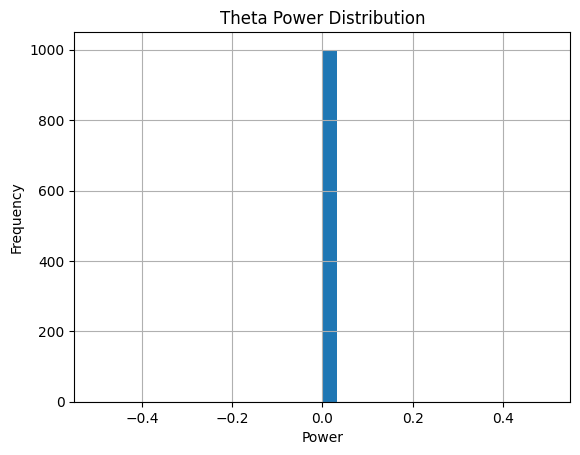

In [13]:
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt


eeg_data=eeg_data.head(200)#temp


def compute_bandpower(signal, fs, band):
    freqs, psd = welch(signal, fs=fs, nperseg=fs*2)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.sum(psd[idx_band]) * freq_res

fs = 128  # Hz

# Define all frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}

# Store results
band_features = {band: [] for band in bands}


# Iterate through EEG rows
for i, row in eeg_data.iterrows():
    band_means = {band: [] for band in bands}


    for val in row:
        simulated_signal = np.ones(fs * 2) * val
        for band, freq_range in bands.items():
            power = compute_bandpower(simulated_signal, fs, freq_range)
            band_means[band].append(power)

    for band in bands:
        band_features[band].append(np.mean(band_means[band]))

# Create feature DataFrame
X = pd.DataFrame(band_features)
X['theta_beta_ratio'] = X['theta'] / X['beta']
y = eeg_data['Class']



#Test code
print(X.shape)
print(y.shape)

print(X.isnull().sum())
print(np.isinf(X).sum())

X['theta'].hist(bins=30)
plt.title('Theta Power Distribution')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

